In [21]:
#https://mikulskibartosz.name/how-to-reduce-memory-usage-in-pandas

def rm(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    for col in df.columns:
        col_type = df[col].dtype
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if c_min == 0 and c_max == 1:
                    df[col] = df[col].astype('bool')
            elif str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [15]:
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, balanced_accuracy_score, confusion_matrix, recall_score, precision_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sn

path_csv = "../../../../Thesis_data/processed_data/"
path_model = "../../../../Thesis_data/Models/"

In [2]:
X_test = pd.read_csv(path_csv + "ontime_reporting_X_test.csv")
y_test = pd.read_csv(path_csv + "ontime_reporting_y_test.csv")

In [22]:
X_test = rm(X_test)
y_test = np.ravel(y_test)

Memory usage of dataframe is 326.45 MB
Memory usage after optimization is: 60.45 MB
Decreased by 81.5%


In [13]:
def evaluation(y_test_input, y_pred_input):

    print("AUROC Score: ", roc_auc_score(y_test_input, y_pred_input))
    print("Balanced Accuracy Score: ", balanced_accuracy_score(y_test_input, y_pred_input))
    print("Accuracy Score: ", accuracy_score(y_test_input, y_pred_input))
    print("Recall Score: ", recall_score(y_test_input, y_pred_input))
    print("Precision Score: ", precision_score(y_test_input, y_pred_input))
    cm = confusion_matrix(y_test_input, y_pred_input)

    fig, ax = plt.subplots(figsize=(4, 6))
    ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
    
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

## Evaluate Logistic Regression baseline model

In [23]:
logreg_baseline = pickle.load(open(path_model + "logreg_baseline.sav", "rb"))
y_pred_logreg_baseline = logreg_baseline.predict(X_test)

AUROC Score:  0.5
Balanced Accuracy Score:  0.5
Accuracy Score:  0.8109001083694348
Recall Score:  0.0


C:\Users\Rvanl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision Score:  0.0


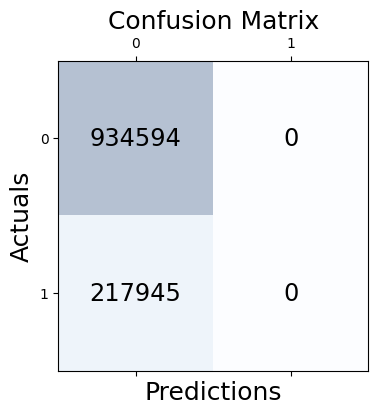

In [24]:
evaluation(y_test, y_pred_logreg_baseline)

## Evaluate XGBoost baseline model

In [25]:
xgb_class_baseline = pickle.load(open(path_model + "XGBoost_baseline.sav", "rb"))
y_pred_xgb_baseline = xgb_class_baseline.predict(X_test)

AUROC Score:  0.6654932010407597
Balanced Accuracy Score:  0.6654932010407597
Accuracy Score:  0.8486793071644431
Recall Score:  0.37088715042786025
Precision Score:  0.6843063221699232


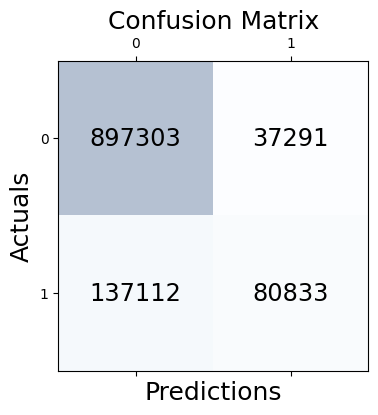

In [26]:
evaluation(y_test, y_pred_xgb_baseline)